## Preparación de datos

La primera etapa de este proyecto va a constar de la corrección de datos, lidiar y analizar los valores ausentes, buscar duplicados explícitos e implícitos, correccion de tipos de datos, eliminar información que no es estadísticamente relevante y finalmente el enriquecimiento de la información con la que se cuenta. 

### Importación de librerías

In [528]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

### Carga y descripción de datos

In [529]:
videogames_df = pd.read_csv('../datasets/games.csv')

##### Descripción de datos
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género)
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
* EU_sales (ventas en Europa en millones de dólares estadounidenses)
* JP_sales (ventas en Japón en millones de dólares estadounidenses)
* Other_sales (ventas en otros países en millones de dólares estadounidenses)
* Critic_Score (máximo de 100)
* User_Score (máximo de 10)
* Rating (ESRB)

*Es posible que los datos de 2016 estén incompletos.

##### Descripción de Rating (ESRB)

| Clasificación |      Nombre     | Edad Mínima |                               Descripción                               |
|:-------------:|:---------------:|:-----------:|:-----------------------------------------------------------------------:|
| E             | Everyone        | Todos       | Para todos. Contenido apropiado para todas las edades.                  |
| E10+          | Everyone 10+    | 10+         | Para mayores de 10. Contenido adecuado para niños mayores.              |
| EC            | Early Childhood | 3+          | Para niños pequeños. Contenido educativo o de entretenimiento.          |
| K-A           | Kids to Adults  | Todos       | (Anteriormente usado) Similar a E, apropiado para todos.                |
| T             | Teen            | 13+         | Para adolescentes. Contenido adecuado para mayores de 13.               |
| M             | Mature          | 17+         | Para mayores de 17. Contenido maduro con violencia intensa o explícita. |
| AO            | Adults Only     | 18+         | Solo para adultos. Contenido extremadamente gráfico.                    |
| RP            | Rating Pending  | N/A         | Clasificación pendiente, aún no revisado por ESRB.                      |

#### Información general y muestra de datos

In [530]:
videogames_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [531]:
print(videogames_df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


### Corrección de datos

In [532]:
# Cambia a minúsculas los nombres de columnas
new_columns_names = []  # nueva lista vacía

# Bucle que itera sobre las columnas del DF
for old_columns in videogames_df:
    new_columns = old_columns.lower()   # Cambia los nombres a minúsculas
    col_stripped = new_columns.strip()  # Quita los espacios
    # Agrega a la lista de new_column_names
    new_columns_names.append(col_stripped)

videogames_df.columns = new_columns_names   # Reemplaza los nombres

print(videogames_df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


### Duplicados explícitos y duplicados implícitos

In [533]:
# Selecciona las columnas a revisar y mostrar los valores únicos para cada una
columns_to_check = ['platform', 'genre', 'rating', 'critic_score', 'user_score']

for column in columns_to_check:
    unique_values = sorted(videogames_df[column].unique().astype('str'))
    print(f'{column} valores únicos:\n{unique_values}\n')

platform valores únicos:
['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

genre valores únicos:
['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 'nan']

rating valores únicos:
['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'nan']

critic_score valores únicos:
['13.0', '17.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0', '28.0', '29.0', '30.0', '31.0', '32.0', '33.0', '34.0', '35.0', '36.0', '37.0', '38.0', '39.0', '40.0', '41.0', '42.0', '43.0', '44.0', '45.0', '46.0', '47.0', '48.0', '49.0', '50.0', '51.0', '52.0', '53.0', '54.0', '55.0', '56.0', '57.0', '58.0', '59.0', '60.0', '61.0', '62.0', '63.0', '64.0', '65.0', '66.0', '67.0', '68.0', '69.0', '70.0', '71.0', '72.0', '73.0', '74.0', '75.0', '76.0', 

In [534]:
# Imprime el total de filas duplicadas
print(videogames_df.duplicated().sum())

0


### Valores ausentes

In [535]:
# Suma los valores austentes en cada columna
print(videogames_df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [536]:
# Contando los juegos lanzados en cada año
print(videogames_df['year_of_release'].value_counts(dropna=False).sort_index())

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
NaN        269
Name: count, dtype: int64


In [537]:
# Mantiene los datos posteriores a 1994 y reinicia el index
games = videogames_df.query('year_of_release >= 1994').reset_index(drop=True)

print('Total de filas eliminadas', videogames_df['year_of_release'].count()-games['year_of_release'].count(),'\n')
print(games['year_of_release'].value_counts(dropna=False).sort_index())

Total de filas eliminadas 367 

year_of_release
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64


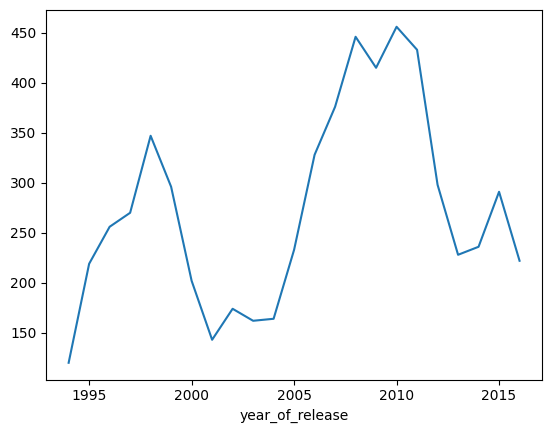

rating
NaN     6315
E       3921
T       2903
M       1535
E10+    1392
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64


In [538]:
# Imprime una gráfica mostrando en cuáles años se tienen valores ausentes en la columna 'rating'
games['rating'].isna().groupby(games['year_of_release']).sum().plot(kind='line')
plt.show()

print(games['rating'].value_counts(dropna=False))

In [539]:
# Rellena los valores ausentes de la columna rating con RP (rating pending)
games['rating'] = games['rating'].fillna('RP')

In [540]:
# Busca valores ausentes en la columna 'name'
print(games['name'].isna().sum())

0


In [541]:
# Confirmando valores ausentes
print(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8099
user_score         6243
rating                0
dtype: int64


In [542]:
# crea una columna nueva para 'critic_score' que se mantenga en tipo de datos float
games['critic_score_float'] = games['critic_score']

# rellena valores ausentes en columna 'critic_score' con 'not_rated'
games['critic_score'] = games['critic_score'].fillna('not_rated')

In [543]:
print(games['user_score'].value_counts(dropna=False).sort_values(ascending=False))

user_score
NaN    6243
tbd    2376
7.8     322
8       285
8.2     275
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 97, dtype: int64


In [544]:
# Crea una nueva columna para 'user_score' y reemplaza 'not_rated' con valores nan
games['user_score_float'] = games['user_score'].replace('tbd',np.nan)
games['user_score_float'] = games['user_score_float'].astype('float')

# Rellena valores ausentes en columna 'user_score' con 'not_rated'
games['user_score'] = games['user_score'].fillna('not_rated')

In [545]:
games[['critic_score_float','user_score_float']].describe()

,critic_score_float,user_score_float
count,7980.000000,7460.000000
mean,68.994236,7.127024
std,13.920962,1.498533
min,13.000000,0.000000
25%,60.000000,6.400000
50%,71.000000,7.500000
75%,79.000000,8.200000
max,98.000000,9.700000


### Enriquecimiento de datos

In [546]:
# creando columna de 'total_sales' que suma las ventas de todas las regiones
games['total_sales'] = games[['na_sales', 'eu_sales','jp_sales', 'other_sales']].sum(axis=1)
print(games.sample(5))

                             name platform  year_of_release         genre  \
3586          Lords of the Fallen      PS4           2014.0  Role-Playing   
457    Sonic Mega Collection Plus      PS2           2004.0          Misc   
9946   Fatal Frame 2: Wii Edition      Wii           2012.0        Action   
15575      Konami Classics Vol. 2     X360           2009.0          Misc   
6222                    Evil Zone       PS           1998.0      Fighting   

       na_sales  eu_sales  jp_sales  other_sales critic_score user_score  \
3586       0.18      0.24      0.02         0.08         68.0        6.6   
457        1.54      1.14      0.00         0.22         73.0        8.6   
9946       0.00      0.00      0.10         0.00    not_rated  not_rated   
15575      0.01      0.00      0.00         0.00    not_rated        tbd   
6222       0.14      0.10      0.00         0.02    not_rated  not_rated   

      rating  critic_score_float  user_score_float  total_sales  
3586       M  

In [585]:
# crea DF con nombres de Consoles + compañías productoras para referenciar

platform = [
    'Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4', '3DS', 'N64',
    'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT',
    'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'
]

manufacturer = [
    'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Microsoft', 'Sony', 'Sony', 'Nintendo',
    'Nintendo', 'Sony', 'Nintendo', 'Nintendo', 'Sony', 'Microsoft', 'Others', 'Atari',
    'Sony', 'Microsoft', 'Nintendo', 'Nintendo', 'Sega', 'Sega', 'Sony', 'Sega',
    'Sega', 'Bandai', 'SNK', 'NEC', 'Panasonic', 'Sega', 'NEC'
]


device_type = [
    'Console', 'Console', 'Handheld', 'Handheld', 'Console', 'Console', 'Console', 'Console',
    'Handheld', 'Console', 'Handheld', 'Console', 'Console', 'Console', 'Console', 'Console',
    'Handheld', 'Console', 'Console', 'Console', 'Console', 'Console', 'Handheld', 'Console',
    'Console', 'Handheld', 'Handheld', 'Console', 'Console', 'Handheld', 'Console'
]

# Crear un DataFrame de plataformas con manufacturer y device_type
platform_df = pd.DataFrame({
    'platform': platform,
    'manufacturer': manufacturer,
    'device_type': device_type
})


# Unir el DataFrame de plataformas con el DataFrame de juegos
games = games.merge(platform_df, on='platform', how='left')

# muestra del DF
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1            Mario Kart Wii      Wii           2008.0        Racing     15.68   
2         Wii Sports Resort      Wii           2009.0        Sports     15.61   
3  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   
4     New Super Mario Bros.       DS           2006.0      Platform     11.28   

   eu_sales  jp_sales  other_sales critic_score user_score rating  \
0     28.96      3.77         8.45         76.0          8      E   
1     12.76      3.79         3.29         82.0        8.3      E   
2     10.93      3.28         2.95         80.0          8      E   
3      8.89     10.22         1.00    not_rated  not_rated     RP   
4      9.14      6.50         2.88         89.0        8.5      E   

   critic_score_float  user_score_float  total_sales manufacturer_x  \
0                76.0      

### Resumen de modificaciones y correcciones

**Formatos de columnas:**<br>
En esta sección, se modificó el nombre de las columnas homologando su formato. 

**Columna `year_of_release`**<br>
Se comenzó revisando cuántos datos existían de cada año y basado en esta información se filtraron y eliminaron los años anteriores a *1993* ya que no contenían suficiente información para que fueran relevantes para este informe, se eliminaron un total de 305 filas. 

**Duplicados**<br>
* No se encontraron duplicados explícitos cuando se buscaron filas completamente duplicadas.
* Tampoco se encontraron duplicados implícitos cuando se buscaron valores únicos con la misma información en las columnas `platform`, `genre` y `rating` que son columnas categóricas en las que se podrían esperar este tipo de errores.

**Valores ausentes**<br>
Bajo la suposición de que podrían exisistir videojuegos que en unas consolas sí tuvieran un rating o género o año de lanzamiento y en otras consolas tuvieran valores ausentes en estas columnas, se creó la función de `fill_values` que rellena los valores ausentes en una columna `fill_column` usando los valores no nulos de la misma columna en otros registros con el mismo valor en la columna `column_name`, al final comparando los valores ausentes en el DF no se encontraron diferencias.

* En el caso de la columna de `rating` los valores ausentes (5975) se rellenaron con 'RP' (Rating Peding).
* Para la columna `user_score` los valores con el string 'tbd' (2,376) se dejaron así y en el caso de los valores ausentes (6,303) se rellenaron con 'not_rated'.
* en la columna `critic_score`, los valores ausentes nan: 8,159 se rellenaron con 'not rated'.


Para evitar errores con el tipo de datos con las columnas `user_score` y `critic_score`, se crearon las columnas nuevas `user_score_float` y `critic_score_float`, en estas columnas los strings 'not_rated' y 'tbd' se convirtieron a valores ausentes para tener un resultado más preciso a la hora de realizar cálculos.

* También existían 2 filas con valores ausentes en la columna `name` las cuales únicamente contenían información de la plataforma y las ventas, para este ejercicio fueron eliminadas del DF.


**Enriquecimiento de datos**
* Se creó la nueva columna `total_sales` que suma las ventas de todas las regiones.
* Se creó un DF `platforms_df` que cuenta con la relación entre la consola (`platform`) y la compañía fabricante (`manufacturer`), luego, se integró esta información en el DF `games` con un merge left.
* Se agregaron listas que contienen los tipos de consolas.

## Analisis de datos

### Analizando los datos ausentes en user_score

<Axes: xlabel='year_of_release'>

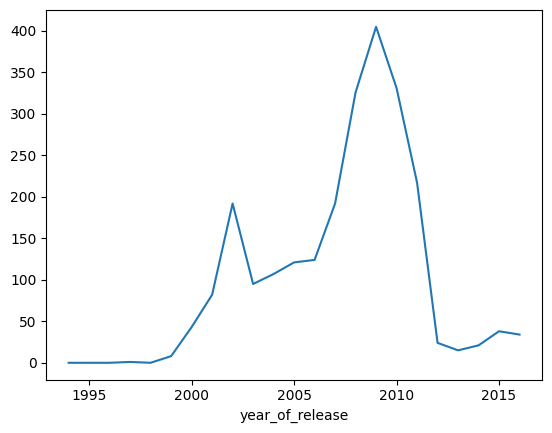

In [551]:
# Comprobando si los 'tbd' son calificaciones recientes
(games['user_score'] == 'tbd').groupby(games['year_of_release']).sum().plot(kind= 'line')

Con esta grafica podemos comprobar que, los 'tbd' no necesariamente son los de años más recientes.

### Juegos lanzados por año

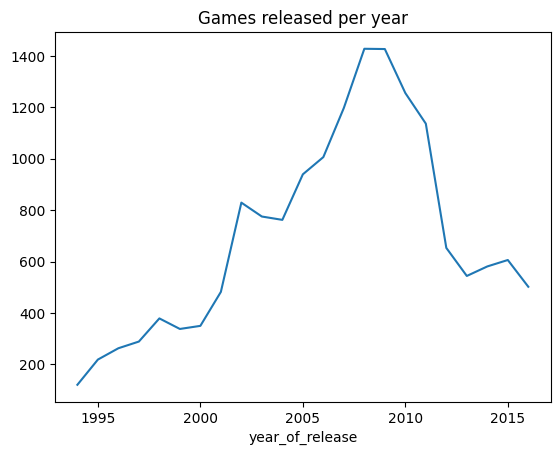

In [552]:
games.groupby('year_of_release')['name'].count().plot(kind= 'line', title= 'Games released per year')

plt.show()

### Creando listas para el análisis

In [549]:
# Listas de tipos de consolas

microsoft_consoles = (games[(games['manufacturer'] == 'Microsoft') & (games['device_type'] == 'Console')]['platform']).unique()

sony_consoles = (games[(games['manufacturer'] == 'Sony') & (games['device_type'] == 'Console')]['platform']).unique()
sony_handhelds = (games[(games['manufacturer'] == 'Sony') & (games['device_type'] == 'Handheld')]['platform']).unique()

nintendo_consoles = (games[(games['manufacturer'] == 'Nintendo') & (games['device_type'] == 'Console')]['platform']).unique()
nintendo_handheld = (games[(games['manufacturer'] == 'Nintendo') & (games['device_type'] == 'Handheld')]['platform']).unique()

In [553]:
# Listas de top de ventas 

top_sales_platforms = list(games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index)
print('Top 10 plataformas más vendidas:',top_sales_platforms)

top_sales_consoles = list(games[games['device_type'] == 'Console'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index)
print('Top 10 consolas más vendidas:',top_sales_consoles)

top_sales_handheld = list(games[games['device_type'] == 'Handheld'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index)
print('Top 10 consolas portátiles más vendidas:',top_sales_handheld)


Top 10 plataformas más vendidas: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
Top 10 consolas más vendidas: ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'PS4', 'PC', 'XB', 'N64', 'GC']
Top 10 consolas portátiles más vendidas: ['DS', 'GBA', 'PSP', '3DS', 'GB', 'PSV', 'WS']


### Análisis por plataformas

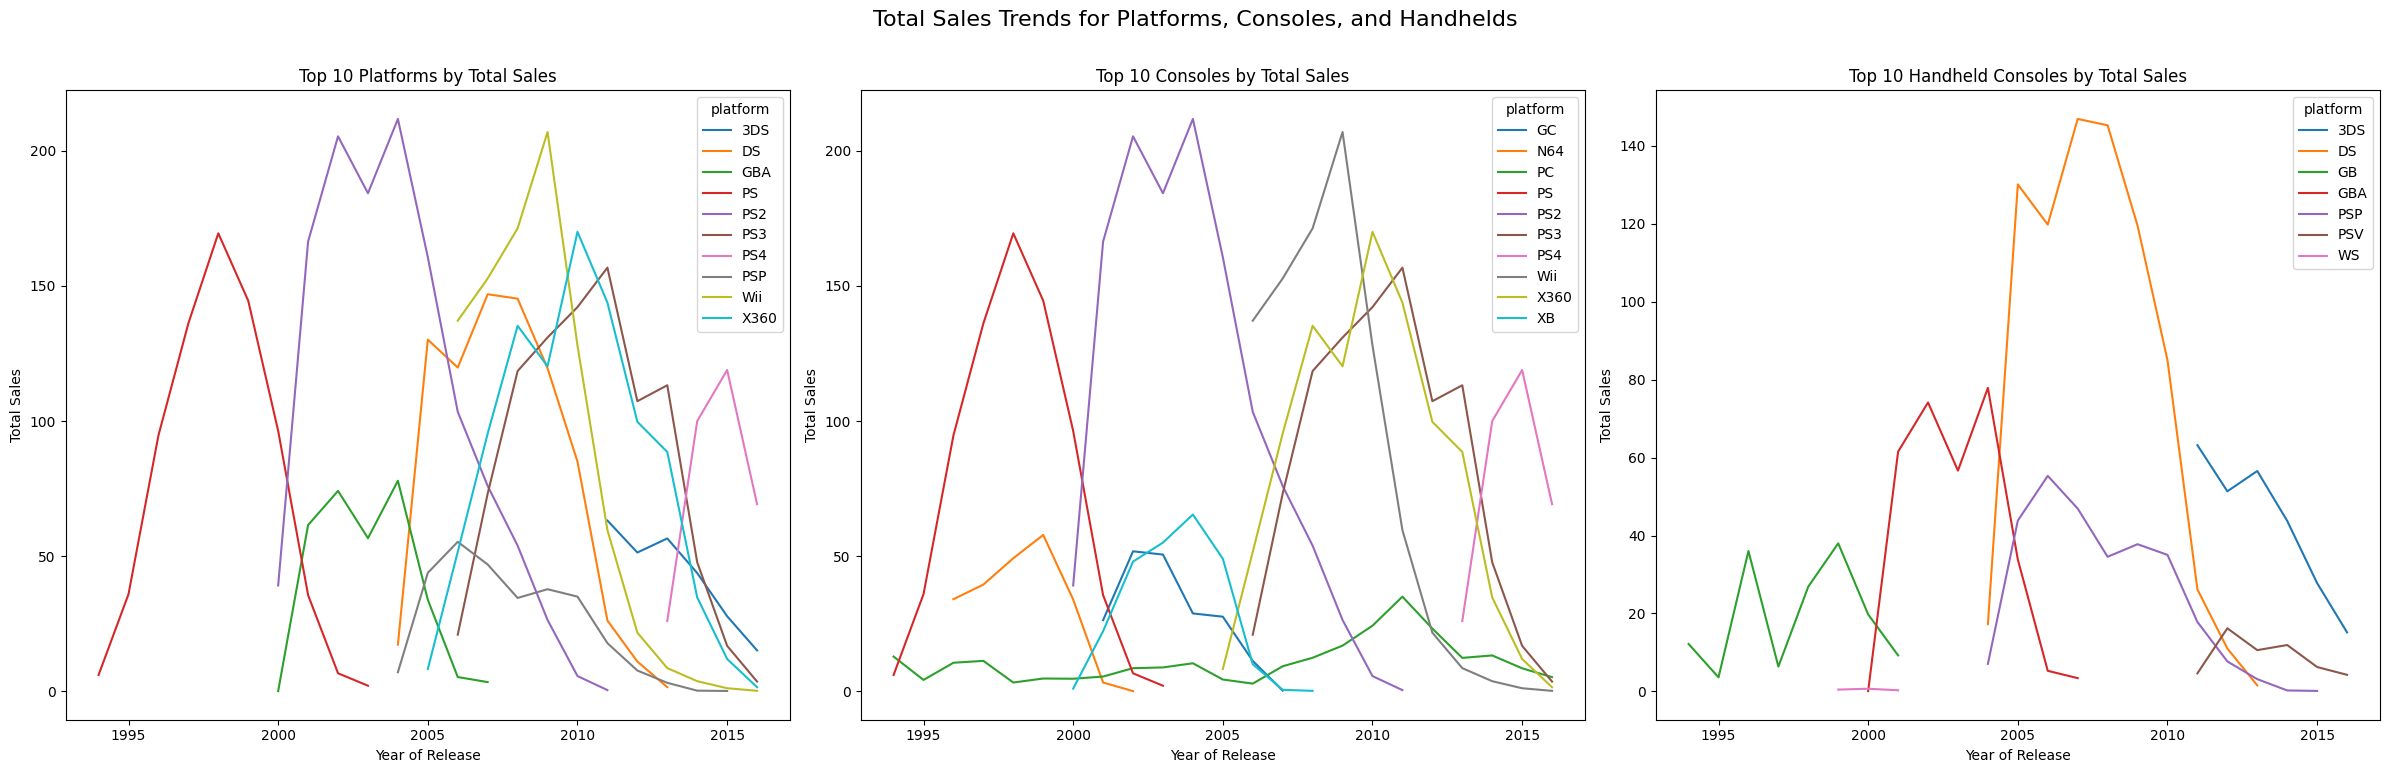

In [554]:
# Crear subplots de 1 fila por 3 columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
fig.subplots_adjust(wspace=0.3)

# Gráfico para las plataformas más vendidas
pivot_platforms = games[games['platform'].isin(top_sales_platforms)].pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
pivot_platforms.plot(kind='line', ax=axes[0])
axes[0].set_title('Top 10 Platforms by Total Sales')
axes[0].set_xlabel('Year of Release')
axes[0].set_ylabel('Total Sales')

# Gráfico para las consolas más vendidas
pivot_consoles = games[games['platform'].isin(top_sales_consoles)].pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
pivot_consoles.plot(kind='line', ax=axes[1])
axes[1].set_title('Top 10 Consoles by Total Sales')
axes[1].set_xlabel('Year of Release')
axes[1].set_ylabel('Total Sales')

# Gráfico para las consolas portátiles más vendidas
pivot_handhelds = games[games['platform'].isin(top_sales_handheld)].pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
pivot_handhelds.plot(kind='line', ax=axes[2])
axes[2].set_title('Top 10 Handheld Consoles by Total Sales')
axes[2].set_xlabel('Year of Release')
axes[2].set_ylabel('Total Sales')

# Título principal
fig.suptitle('Total Sales Trends for Platforms, Consoles, and Handhelds', fontsize=16, y=0.96)

# Ajustar el layout
fig.tight_layout(rect=[0, 0, 1, 0.95]) # Deja espacio para el título principal
plt.show()

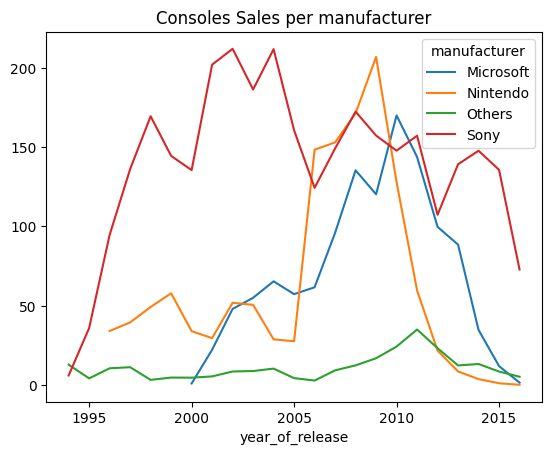

In [555]:
games[games['platform'].isin(top_sales_consoles)].pivot_table(index='year_of_release',
                  columns='manufacturer',
                  values='total_sales',
                  aggfunc='sum'
                  ).plot(
                      kind='line',
                      title='Consoles Sales per manufacturer')

plt.show()

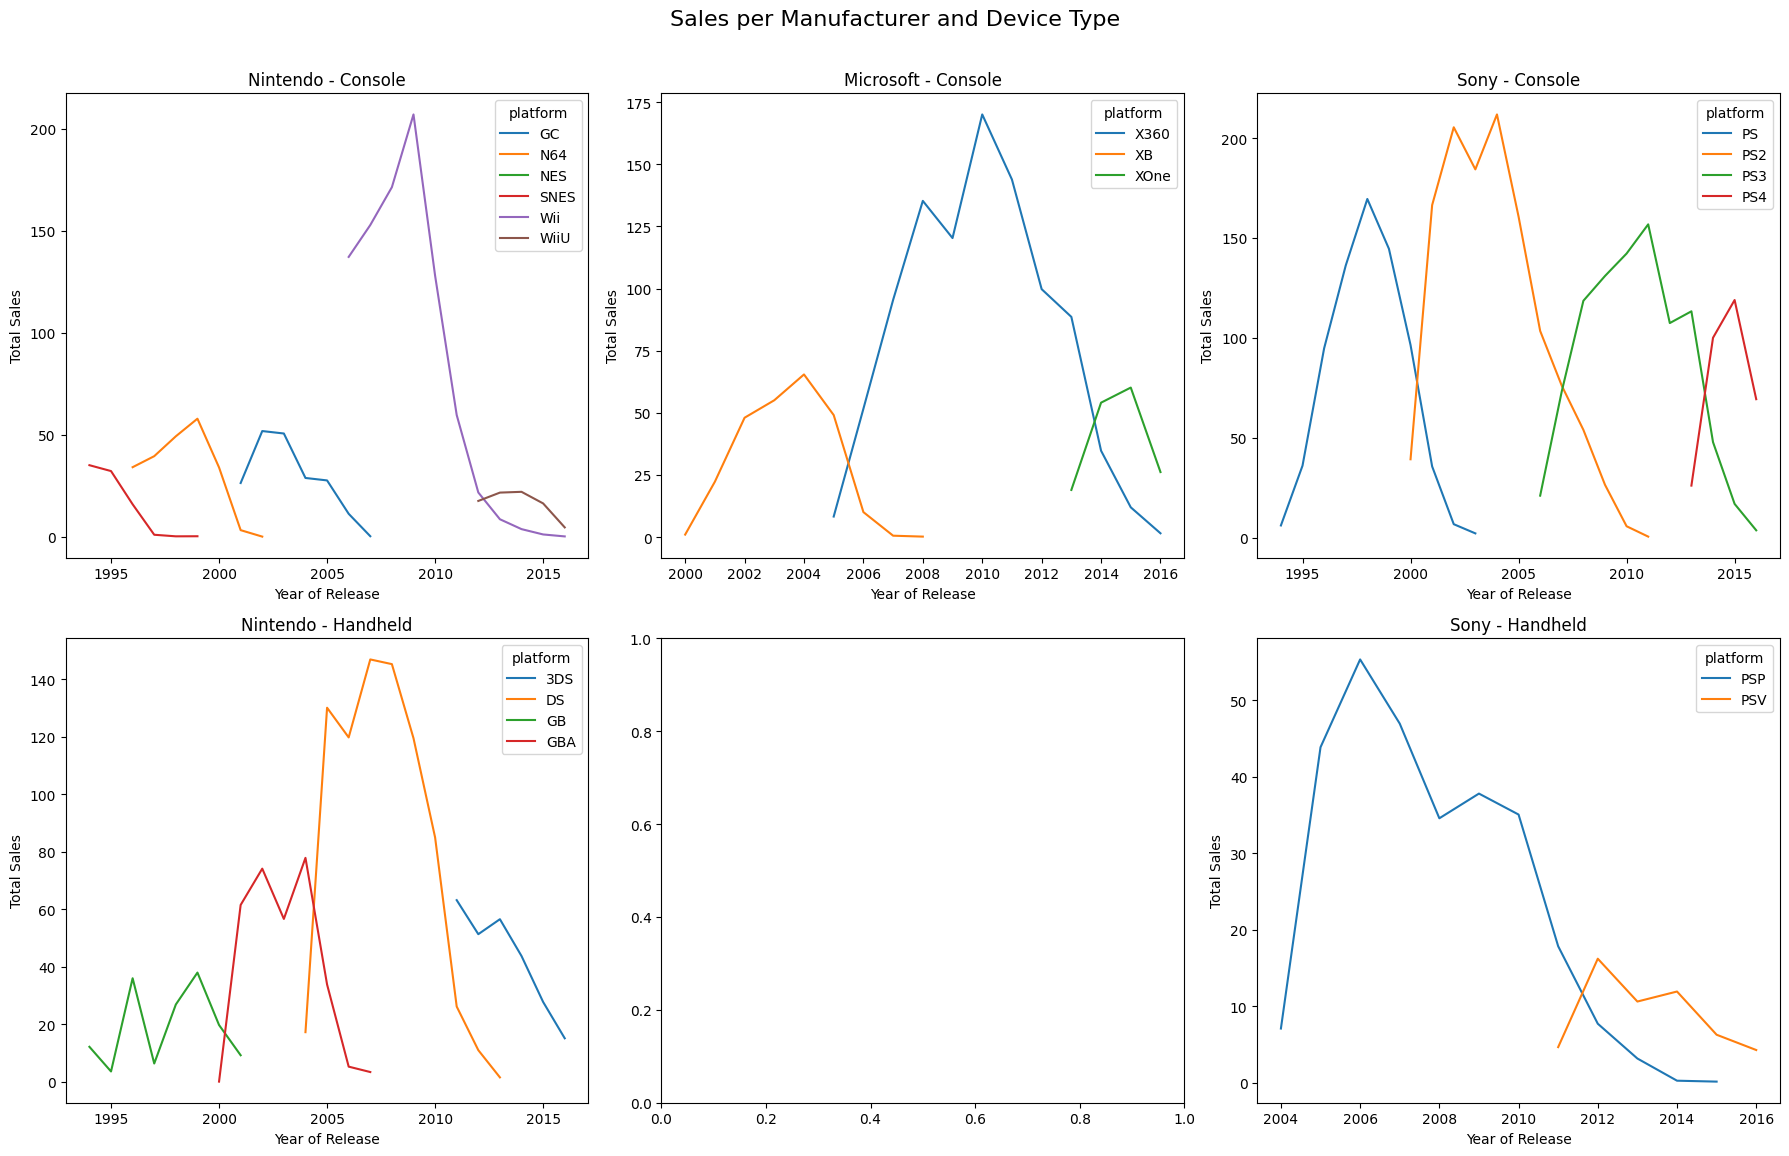

In [556]:
# Lista de tipos de dispositivo a analizar
device_types = ['Console', 'Handheld']

# Crear subplots de 2 filas por 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Crear gráficos por fabricante y tipo de dispositivo
for device_type, row in zip(device_types, axes):
    for ax, manufacturer in zip(row, games['manufacturer'].unique()):
        # Filtrar datos
        filtered_data = games[(games['manufacturer'] == manufacturer) & (games['device_type'] == device_type)]
        
        if not filtered_data.empty:
            # Pivotear los datos para la gráfica de líneas
            pivot = filtered_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
            
            # Graficar
            pivot.plot(kind='line', ax=ax)
            ax.set_title(f'{manufacturer} - {device_type}')
            ax.set_xlabel('Year of Release')
            ax.set_ylabel('Total Sales')

# Título principal
fig.suptitle('Sales per Manufacturer and Device Type', fontsize=16, y=0.96)

# Ajustar el layout
fig.tight_layout(rect=[0, 0, 1, 0.95]) # Deja espacio para el título principal
plt.show()

In [557]:
sales_per_year_pivot = games[games['platform'].isin(top_sales_consoles)].pivot_table(
                                index='year_of_release',
                                columns='platform',
                                values='total_sales',
                                aggfunc='sum')


print('Consolas:\n',sales_per_year_pivot)

sales_per_year_handheld_pivot = games[games['platform'].isin(top_sales_handheld)].pivot_table(
                                index='year_of_release',
                                columns='platform',
                                values='total_sales',
                                aggfunc='sum')


print('Portátiles:\n',sales_per_year_handheld_pivot)


Consolas:
 platform            GC    N64     PC      PS     PS2     PS3     PS4     Wii  \
year_of_release                                                                
1994.0             NaN    NaN  12.87    6.03     NaN     NaN     NaN     NaN   
1995.0             NaN    NaN   4.22   35.96     NaN     NaN     NaN     NaN   
1996.0             NaN  34.10  10.58   94.70     NaN     NaN     NaN     NaN   
1997.0             NaN  39.50  11.27  136.17     NaN     NaN     NaN     NaN   
1998.0             NaN  49.24   3.26  169.49     NaN     NaN     NaN     NaN   
1999.0             NaN  57.87   4.74  144.53     NaN     NaN     NaN     NaN   
2000.0             NaN  33.97   4.66   96.37   39.17     NaN     NaN     NaN   
2001.0           26.34   3.25   5.47   35.59  166.43     NaN     NaN     NaN   
2002.0           51.81   0.08   8.57    6.67  205.38     NaN     NaN     NaN   
2003.0           50.61    NaN   8.84    2.07  184.31     NaN     NaN     NaN   
2004.0           28.82    NaN

In [558]:
print('Juegos plublicados por plataforma\n',games.groupby('platform')['year_of_release'].nunique().sort_values(ascending=False))

Juegos plublicados por plataforma
 platform
PC      23
PS2     12
PSP     12
X360    12
Wii     11
PS3     11
DS      10
PS      10
XB       9
GB       8
GBA      8
GC       7
N64      7
DC       7
SAT      6
3DS      6
SNES     6
PSV      6
WiiU     5
XOne     4
PS4      4
WS       3
NG       3
3DO      2
SCD      1
TG16     1
PCFX     1
NES      1
GEN      1
Name: year_of_release, dtype: int64


El ciclo de vida de las consolas de videojuegos *normalmente* ronda entre los 7 y los 12 años, a excepción del PC que es un caso especial ya que tiene diferentes funciones y ha evolucionado con el tiempo pero no ha cambiado de nombre.



<Axes: xlabel='platform'>

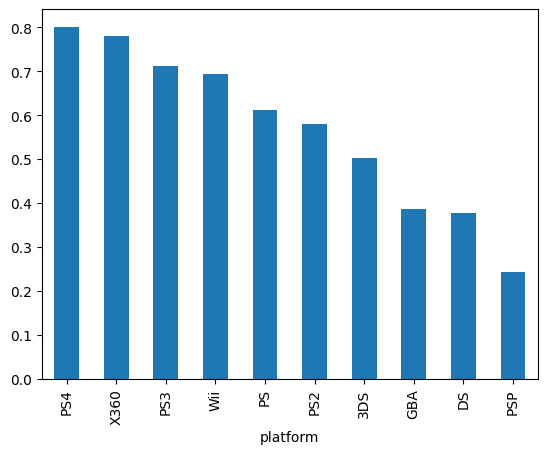

In [588]:
games[games['platform'].isin(top_sales_platforms)].groupby('platform')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar')

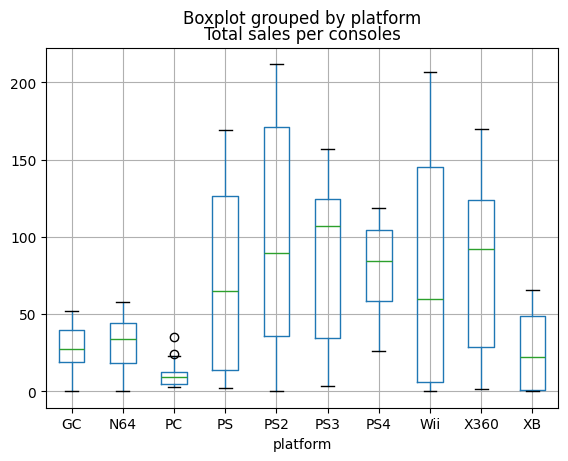

In [560]:
sales_per_year = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

sales_per_year[sales_per_year['platform'].isin(top_sales_consoles)][['total_sales', 'platform']].boxplot(
    column = 'total_sales',
    by = 'platform',
)
plt.title('Total sales per consoles')
plt.show()

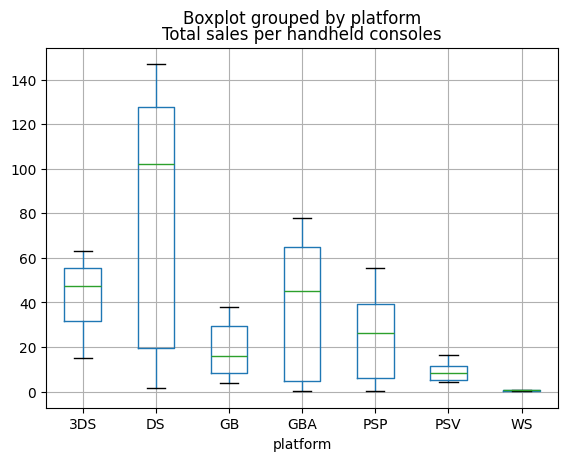

In [561]:
sales_per_year[sales_per_year['platform'].isin(top_sales_handheld)][['total_sales', 'platform']].boxplot(
    column = 'total_sales',
    by = 'platform',
)
plt.title('Total sales per handheld consoles')
plt.show()

### Correlación de calificacion de usuarios y críticos con las ventas totales del PS4

In [562]:
games[games['platform'] == 'PS4'][['total_sales','critic_score_float']].corr()

,total_sales,critic_score_float
total_sales,1.000000,0.406568
critic_score_float,0.406568,1.000000


In [563]:
games[games['platform'] == 'PS4'][['total_sales','user_score_float']].corr()

,total_sales,user_score_float
total_sales,1.000000,-0.031957
user_score_float,-0.031957,1.000000


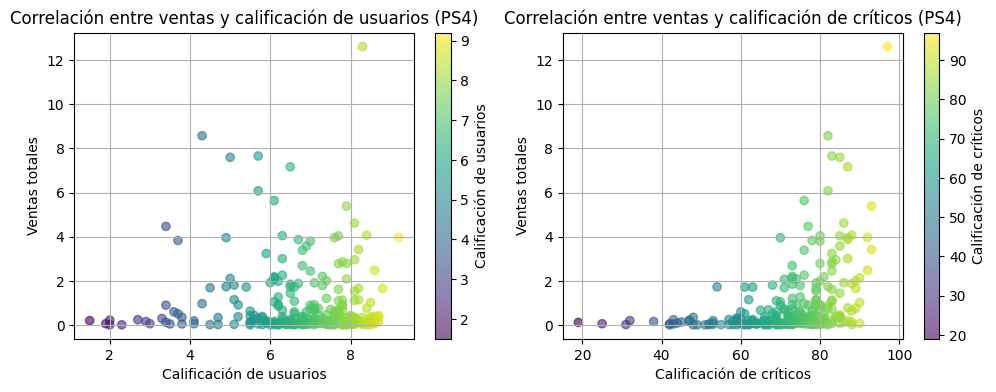

In [564]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
fig.subplots_adjust(wspace=0.3)

# Filtra los datos para la plataforma PS4
ps4_games = games[games['platform'] == 'PS4']

# Gráfica de dispersión de ventas y calificación de usuarios para PS4
scatter_user = ax[0].scatter(
    ps4_games['user_score_float'], 
    ps4_games['total_sales'], 
    alpha=0.6,
    c=ps4_games['user_score_float'],
    cmap='viridis',
    )

# Gráfica de dispersión de ventas y calificación de críticos para PS4
scatter_critic = ax[1].scatter(
    ps4_games['critic_score_float'], 
    ps4_games['total_sales'], 
    alpha=0.6,
    c=ps4_games['critic_score_float'],
    cmap='viridis',
    )

# Agregar etiquetas y título para gráfico de usuarios en PS4
ax[0].set_title('Correlación entre ventas y calificación de usuarios (PS4)')
ax[0].set_xlabel('Calificación de usuarios')
ax[0].set_ylabel('Ventas totales')
ax[0].grid(True)

# Agregar etiquetas y título para gráfico de críticos en PS4
ax[1].set_title('Correlación entre ventas y calificación de críticos (PS4)')
ax[1].set_xlabel('Calificación de críticos')
ax[1].set_ylabel('Ventas totales')
ax[1].grid(True)

# Agregar colorbar para critic_score
cbar_user = fig.colorbar(scatter_user, ax=ax[0])
cbar_user.set_label('Calificación de usuarios')

cbar_critic = fig.colorbar(scatter_critic, ax=ax[1])
cbar_critic.set_label('Calificación de críticos')

fig.tight_layout(pad=1)

plt.show()


### Comparación de ventas de los mismos juegos en diferentes plataformas

In [565]:
top_sales_ps4_games = ps4_games.groupby('name')['total_sales'].sum().sort_values(ascending=False).reset_index().head(5)
print(top_sales_ps4_games)

                             name  total_sales
0       Call of Duty: Black Ops 3        14.63
1              Grand Theft Auto V        12.62
2                         FIFA 16         8.58
3    Star Wars Battlefront (2015)         7.98
4  Call of Duty: Advanced Warfare         7.66


In [566]:
# Crear la lista de juegos que están en múltiples plataformas
multiplatform_games = games.groupby('name')['platform'].nunique() # Cuenta el total de plataformas en las que se publicó el juego
multiplatform_games = multiplatform_games[multiplatform_games > 5].index # Filtra para que solo se guarden los juegos que se publicaron para 5 plataformas o más

# Filtrar los juegos más vendidos en consolas
top_sales_multiplatform_games = games[(games['name'].isin(multiplatform_games)) & (games['device_type'] == 'Console')]

top_sales_multiplatform_games = list(top_sales_multiplatform_games.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).index)

print('Top 5 juegos más vendidos en múltiples plataformas:', top_sales_multiplatform_games)

Top 5 juegos más vendidos en múltiples plataformas: ['Call of Duty: Ghosts', 'Minecraft', 'FIFA 15', 'FIFA 14', 'FIFA Soccer 13']


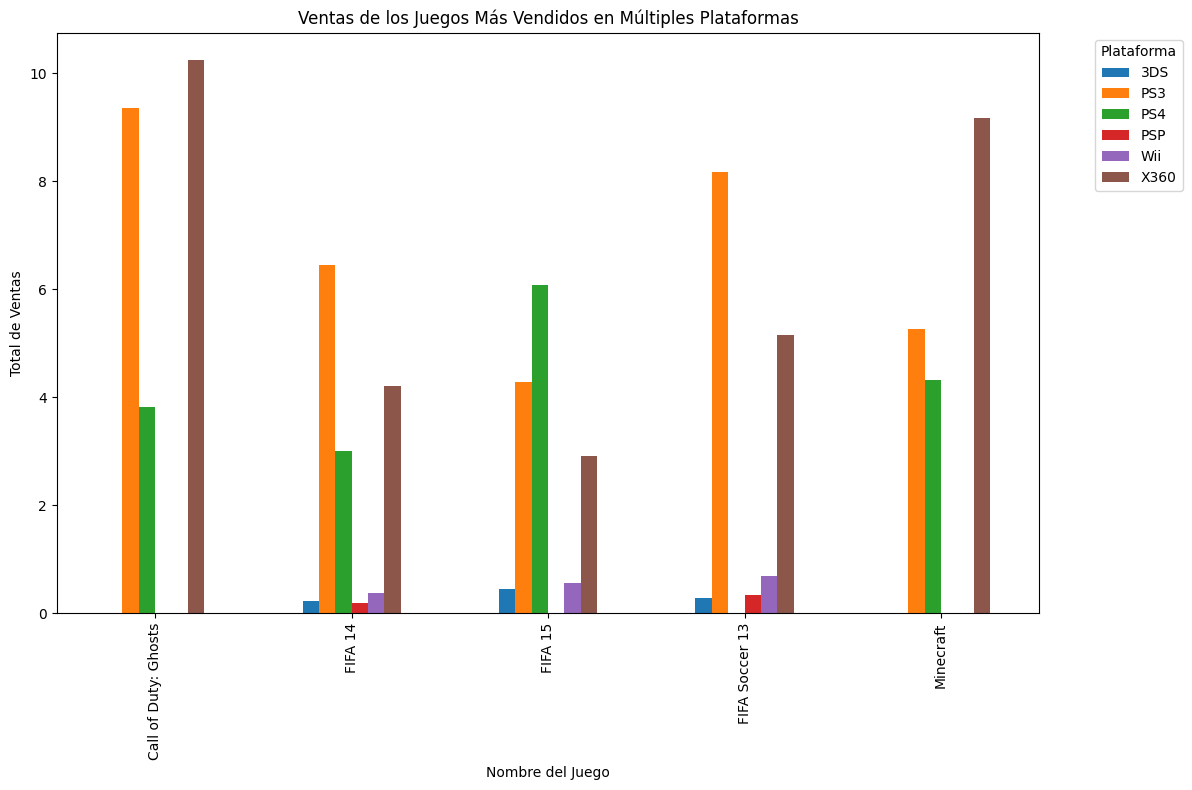

In [567]:
# Paso 3: Filtrar ventas por los juegos más vendidos en múltiples plataformas
sales_data = games[games['name'].isin(top_sales_multiplatform_games) & games['platform'].isin(top_sales_platforms)]

# Paso 4: Crear la gráfica
fig, ax = plt.subplots(figsize=(12, 8))

# Crear una tabla pivot para que `name` sea el índice, `platform` las columnas, y `total_sales` los valores
sales_pivot = sales_data.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')

# Plot de barras apiladas
sales_pivot.plot(kind='bar', ax=ax)

# Configuración de la gráfica
ax.set_title('Ventas de los Juegos Más Vendidos en Múltiples Plataformas')
ax.set_xlabel('Nombre del Juego')
ax.set_ylabel('Total de Ventas')
ax.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()



### Distribución de los juegos por género

In [568]:
# Guarda una lista con los géneros más rentables
top_sales_genres = list(games.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5).index)

# Filtra el DF con juegos lanzados después del 2010
recent_games = games.query('year_of_release > 2010')

# Filtra el DF con juegos lanzados antes del 2010
older_games = games.query('year_of_release < 2010')

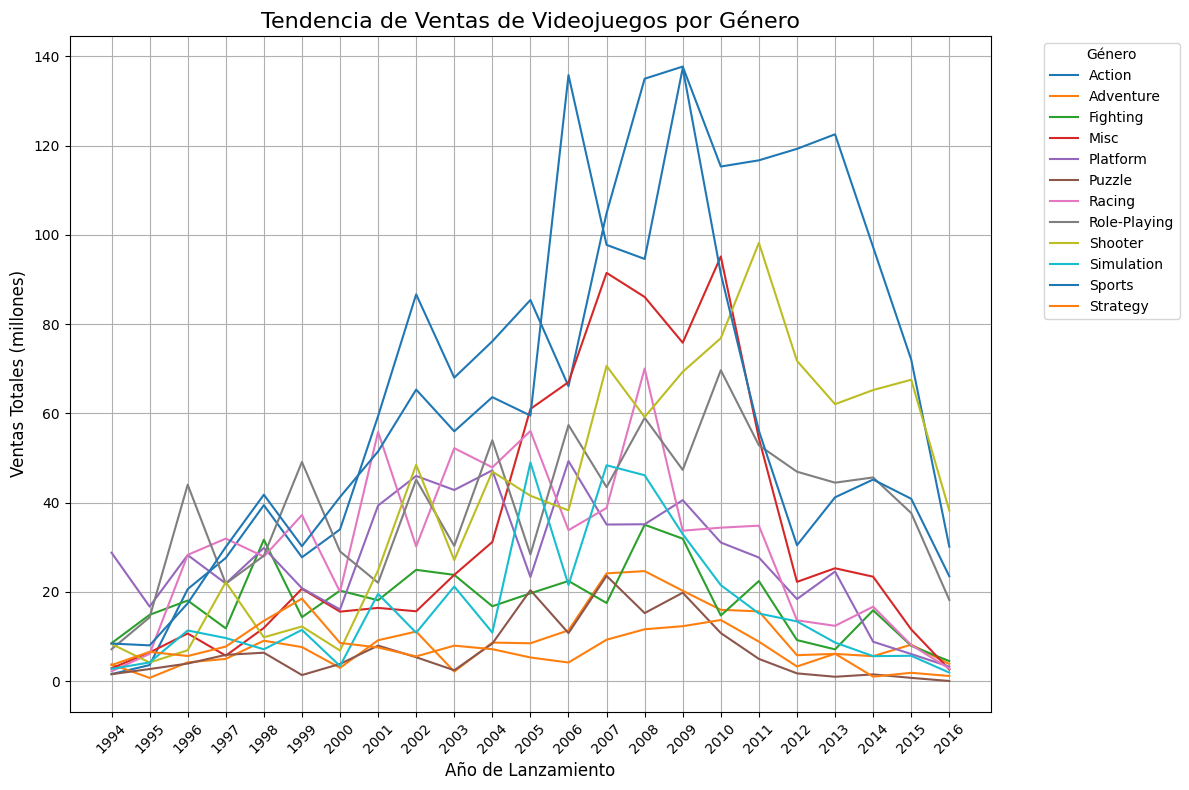

In [569]:
# Crear una tabla pivote con ventas totales por año y género
pivot_sales_genre = games.pivot_table(
    index='year_of_release',
    columns='genre',
    values='total_sales',
    aggfunc='sum'
)

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Generar un gráfico de línea para cada género
for genre in pivot_sales_genre.columns:
    ax.plot(pivot_sales_genre.index, pivot_sales_genre[genre], label=genre)

# Configurar el título, etiquetas y leyenda
ax.set_title('Tendencia de Ventas de Videojuegos por Género', fontsize=16)
ax.set_xlabel('Año de Lanzamiento', fontsize=12)
ax.set_ylabel('Ventas Totales (millones)', fontsize=12)
ax.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mejorar el formato del eje X (años)
plt.xticks(pivot_sales_genre.index, rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


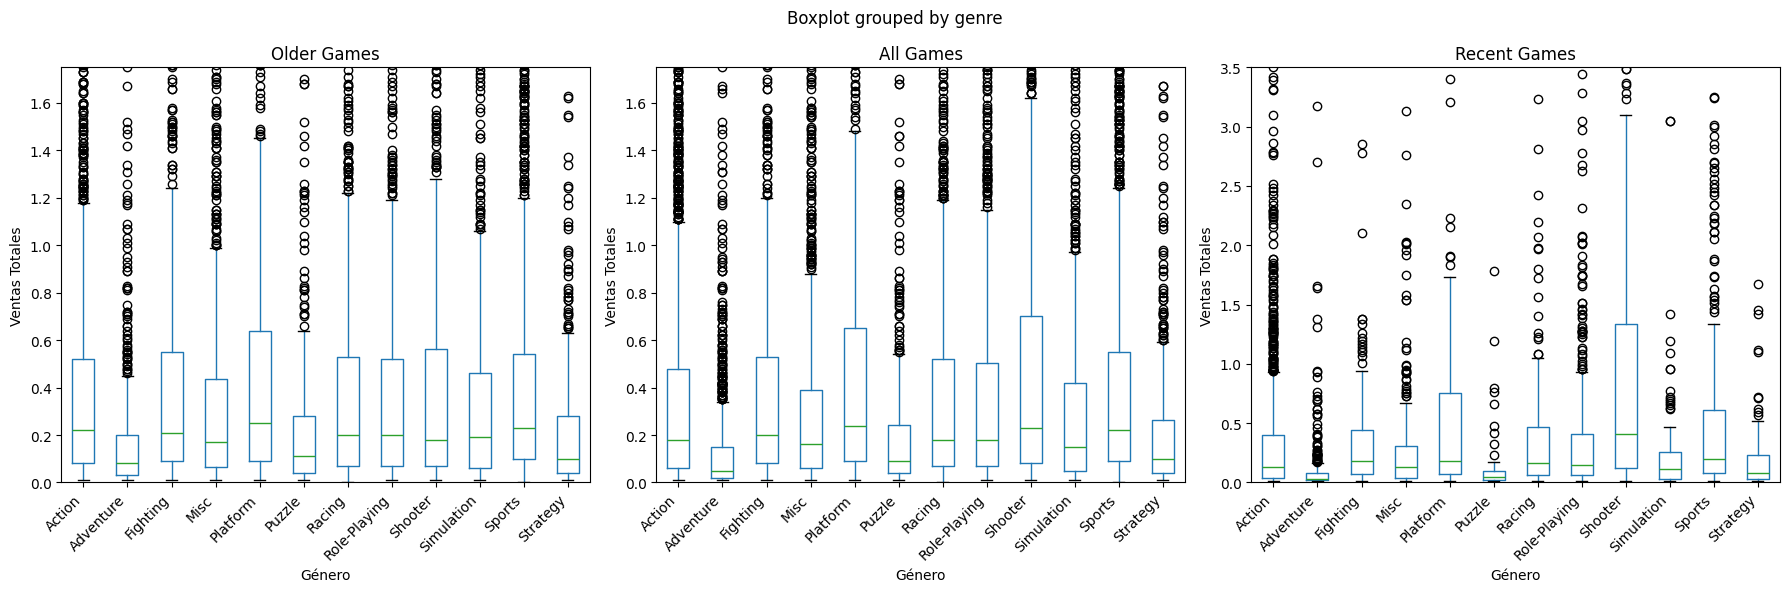

In [570]:
# Configurar la figura con 3 subplots en una fila
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

# Títulos para los subplots
titles = ['Older Games', 'All Games', 'Recent Games']

# Datos para los subplots
data_frames = [older_games, games, recent_games]

# Límites de eje Y
y_lims = [(0, 1.75), (0, 1.75), (0, 3.5)] 

# Generar los boxplots
for ax, df, title, ylim in zip(axes, data_frames, titles, y_lims):
    df.boxplot(column='total_sales', by='genre', ax=ax, vert=True, grid=False)
    ax.set_title(f'{title}')
    ax.set_xlabel('Género')
    ax.set_ylabel('Ventas Totales')
    ax.set_ylim(ylim)  # Establecer el límite del eje y para cada subplot

    # Rotar las etiquetas del eje x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Ajustar diseño
plt.tight_layout()
plt.show()

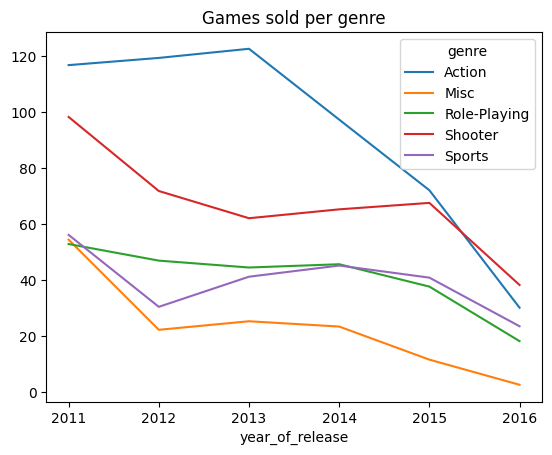

In [571]:
recent_games[recent_games['genre'].isin(top_sales_genres)].pivot_table(index='year_of_release',
                  columns='genre',
                  values='total_sales',
                  aggfunc='sum'
                  ).plot(
                      kind='line',
                      title='Games sold per genre')

plt.show()

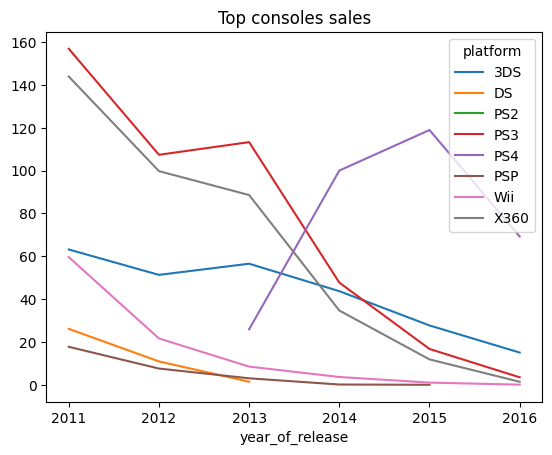

In [572]:
recent_games[recent_games['platform'].isin(top_sales_platforms)].pivot_table(index='year_of_release',
                  columns='platform',
                  values='total_sales',
                  aggfunc='sum'
                  ).plot(
                      kind='line',
                      title='Top consoles sales')

plt.show()

## Perfil de usuario por region

In [573]:
# Obtiene una lista con los ratings más populares
filtered_ratings = games.groupby('rating')['name'].nunique().sort_values(ascending=False)
print(filtered_ratings)
filtered_ratings = list(filtered_ratings[filtered_ratings > 10].index)
    
ratings_sales = games[games['rating'].isin(filtered_ratings)].groupby('rating')['na_sales'].sum().sort_values().tail(5).reset_index()
print(ratings_sales)


rating
RP      5462
E       2627
T       1878
M        864
E10+     787
EC         5
K-A        3
AO         1
Name: name, dtype: int64
  rating  na_sales
0   E10+    345.50
1      M    742.87
2      T    747.58
3     RP    902.99
4      E   1274.24


In [574]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    
    sales_by_platform = games.groupby('platform')[region].sum()

    top_5_patforms = sales_by_platform.sort_values().tail(5).reset_index()
    top_5_patforms['market_share'] = (top_5_patforms[region] / sales_by_platform.sum())*100

    top_5_genres = games.groupby('genre')[region].sum().sort_values().tail(5).reset_index()

    filtered_ratings = games.groupby('rating')['name'].nunique().sort_values(ascending=False)
    filtered_ratings = list(filtered_ratings[filtered_ratings > 10].index)
    ratings_sales = games[games['rating'].isin(filtered_ratings)].groupby('rating')[region].sum().sort_values().tail(5).reset_index()


    print(f'\nSales in {region}')
    print(f'Top 5 platforms:\n{top_5_patforms}\n\nTop 5 genres:\n{top_5_genres}\n\nRating\n{ratings_sales}')



Sales in na_sales
Top 5 platforms:
  platform  na_sales  market_share
0       DS    380.31      9.463908
1      PS3    390.13      9.708276
2      Wii    486.87     12.115624
3      PS2    572.92     14.256955
4     X360    595.74     14.824824

Top 5 genres:
     genre  na_sales
0   Racing    342.82
1     Misc    393.92
2  Shooter    531.30
3   Sports    657.57
4   Action    814.68

Rating
  rating  na_sales
0   E10+    345.50
1      M    742.87
2      T    747.58
3     RP    902.99
4      E   1274.24

Sales in eu_sales
Top 5 platforms:
  platform  eu_sales  market_share
0       PS    212.39      9.074402
1      Wii    258.32     11.036769
2     X360    268.32     11.464021
3      PS3    327.21     13.980107
4      PS2    332.63     14.211678

Top 5 genres:
     genre  eu_sales
0     Misc    209.69
1   Racing    230.32
2  Shooter    310.80
3   Sports    367.90
4   Action    503.47

Rating
  rating  eu_sales
0   E10+    183.33
1      T    420.99
2      M    480.00
3     RP    551.36
4

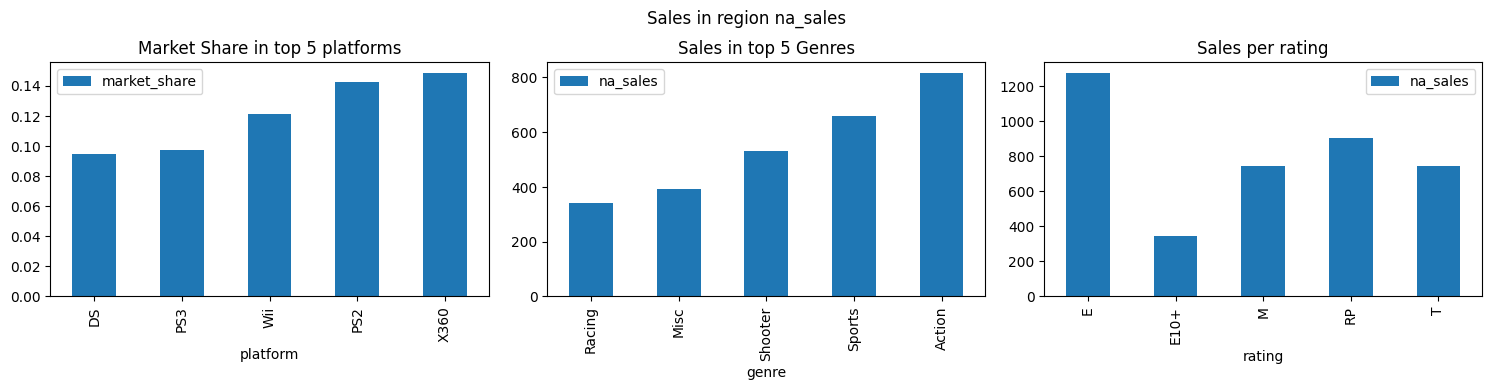

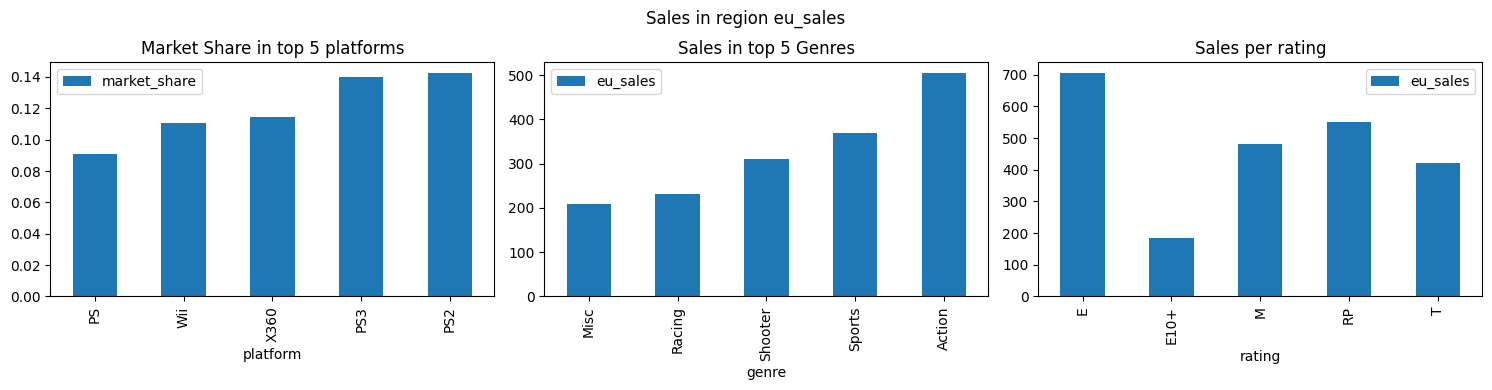

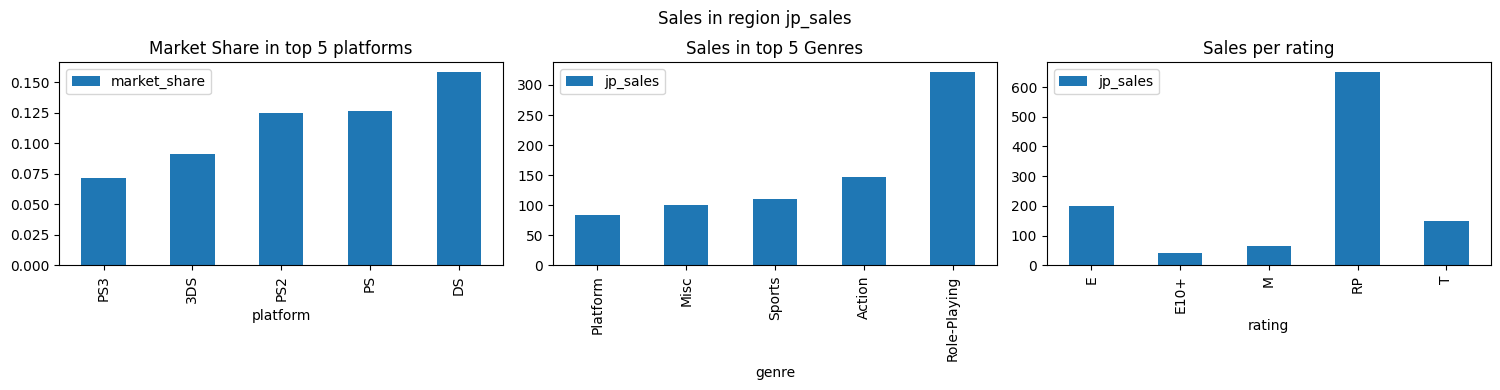

In [575]:
regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    
    sales_by_platform = games.groupby('platform')[region].sum()

    top_5_patforms = sales_by_platform.sort_values().tail(5).reset_index()
    top_5_patforms['market_share'] = top_5_patforms[region] / sales_by_platform.sum()
    top_5_patforms = top_5_patforms.sort_index()

    top_5_genres = games.groupby('genre')[region].sum().sort_values().tail(5).reset_index()
    top_5_genres = top_5_genres.sort_index()
    
    filtered_ratings = games.groupby('rating')['name'].nunique().sort_values(ascending=False)
    filtered_ratings = list(filtered_ratings[filtered_ratings > 10].index)
    
    ratings_sales = games[games['rating'].isin(filtered_ratings)].groupby('rating')[region].sum().sort_index().tail(5).reset_index()

    fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
    fig.suptitle(f'Sales in region {region}', y=0.96)

    axes[0].set_title('Market Share in top 5 platforms')
    top_5_patforms.plot(kind='bar', x='platform', y='market_share', ax=axes[0])

    axes[1].set_title('Sales in top 5 Genres')
    top_5_genres.plot(kind='bar', x='genre', y=region, ax=axes[1])

    axes[2].set_title('Sales per rating')
    ratings_sales.plot(kind='bar', x='rating', y=region, ax=axes[2])

    fig.tight_layout(pad=1)

## Pruebas de hipótesis

###  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

La hipótesis nula es confirmar si las calificaciones promedio de los usuarios de Xbox One y PC son las mismas.
Establecemos un nivel de significación del 5%.

In [576]:
xbox = games[games['platform'] == 'XOne']['user_score_float'].dropna()
pc = games[games['platform'] == 'PC']['user_score_float'].dropna()

alpha = 0.05

print(xbox.var(), pc.var())

1.9069968429360695 2.3231900019831713


In [577]:
# Prueba si las varianzas de las muestras son similares
stat, p_value = st.levene(xbox, pc)
print(f'Statistic: {stat}, p-value: {p_value}')

if p_value < alpha:
    print('Las varianzas son significativamente diferentes. Rechazamos la hipótesis nula.')
else:
    print('No hay evidencia suficiente para decir que las varianzas son diferentes. No podemos rechazar la hipótesis nula.')


Statistic: 1.0495291440389176, p-value: 0.3058813785004164
No hay evidencia suficiente para decir que las varianzas son diferentes. No podemos rechazar la hipótesis nula.


In [578]:
# Prueba si las medias de las muestras son las mismas
stat, p_value = st.ttest_ind(xbox, pc) # realizar una prueba
print(f'Statistic: {stat}, p-value: {p_value}')

if p_value < alpha: # comparar el valor p con el umbral
    print('Las medias son significativamente diferentes. Rechazamos la hipótesis nula')
else:
    print('No hay evidencia suficiente para decir que las medias son diferentes. No podemos rechazar la hipótesis nula')


Statistic: -4.455638657446673, p-value: 9.379956219356064e-06
Las medias son significativamente diferentes. Rechazamos la hipótesis nula


###  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [579]:
action = games[games['genre']== 'Action']['user_score_float'].dropna()
sports = games[games['genre']== 'Sports']['user_score_float'].dropna()

alpha = 0.05

print(action.var(), sports.var())

2.027493768262496 2.623055812519272


In [580]:
# Prueba si las varianzas de las muestras son similares
stat, p_value = st.levene(action, sports)
print(f'Statistic: {stat}, p-value: {p_value}')

if p_value < alpha:
    print('Las varianzas son significativamente diferentes. Rechazamos la hipótesis nula.')
else:
    print('No hay evidencia suficiente para decir que las varianzas son diferentes. No podemos rechazar la hipótesis nula.')

Statistic: 15.429831733332641, p-value: 8.763985507236272e-05
Las varianzas son significativamente diferentes. Rechazamos la hipótesis nula.


In [581]:
# Prueba si las medias de las muestras son las mismas
stat, p_value = st.ttest_ind(action, pc, equal_var=False) # realizar una prueba
print(f'Statistic: {stat}, p-value: {p_value}')

if p_value < alpha: # comparar el valor p con el umbral
    print('Las medias son significativamente diferentes. Rechazamos la hipótesis nula')
else:
    print('No hay evidencia suficiente para decir que las medias son diferentes. No podemos rechazar la hipótesis nula')


Statistic: -0.22290459142975622, p-value: 0.8236440922686036
No hay evidencia suficiente para decir que las medias son diferentes. No podemos rechazar la hipótesis nula
